In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Loading the dataset

In [2]:
df = pd.read_csv(r"customer_segmentation.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In order to, get a full grasp of what steps should I be taking to clean the dataset. Let us have a look at the information in data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the above output, we can conclude and note that:

There are missing values in income
Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
There are some categorical features in our data frame; as there are some features in dtype: object. So we will need to encode them into numeric forms later.
First of all, for the missing values, I am simply going to fill with mean that have missing income values.

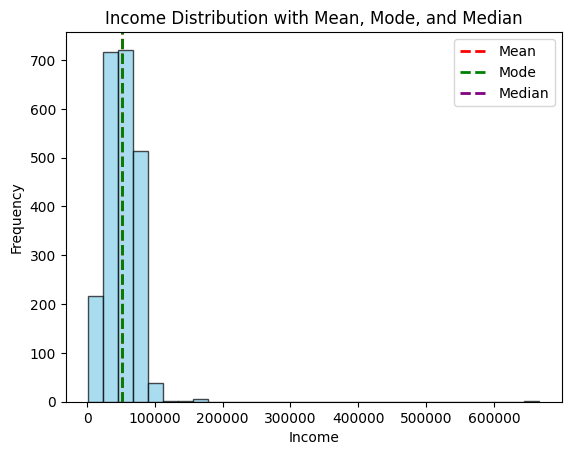

In [8]:
mean =df['Income'].mean()
median=df['Income'].median()
mode= stats.mode(df['Income']).mode
plt.hist(df['Income'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label='Median')

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution with Mean, Mode, and Median')
plt.legend()

# Show the plot
plt.show()

In [9]:
df['Income']=df['Income'].fillna(df['Income'].mean())

In [10]:
df['Income'].isnull().sum()

0

In the next bit, I will be performing the following steps to engineer some new features:
<li>Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
<li>Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
<li>Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
<li>Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
To get further clarity of household, Creating feature indicating "Family_Size"
<li>Create a feature "Is_Parent" to indicate parenthood status
<li>Lastly, I will create three categories in the "Education" by simplifying its value counts.
<li>Dropping some of the redundant features

In [11]:
df['Year_Birth'] = 2014 - df['Year_Birth']


In [12]:
df.rename(columns={'Year_Birth': 'Age'}, inplace=True)


In [13]:
df

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,57,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,60,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,49,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,30,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,33,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,68,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,33,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,58,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [14]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Age                  2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [16]:
df.describe()

,ID,Age,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,45.194196,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,18.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,37.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,44.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,55.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,121.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [17]:
df.columns

Index(['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [18]:
df['spent']=df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']

In [19]:
df['Living_with'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

In [20]:
df['children']=df['Kidhome']+df['Teenhome']

In [21]:
df['family_size']=df['Living_with'].replace({"Alone": 1, "Partner": 2}) + df['children']

In [22]:
df['Is_parent'] = np.where(df.children > 0, 1, 0)

In [23]:
df['Education'] = df['Education'].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [24]:
df =df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [25]:
df = df.drop(columns = ['Marital_Status', 'Dt_Customer', 'ID', 'Z_CostContact', 'Z_Revenue'], axis = 1)

In [26]:
df.head()

,Age,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,spent,Living_with,children,family_size,Is_parent
0,57,Graduate,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,1617,Alone,0,1,0
1,60,Graduate,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,27,Alone,2,3,1
2,49,Graduate,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,776,Partner,0,2,0
3,30,Graduate,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,53,Partner,1,3,1
4,33,Postgraduate,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,422,Partner,1,3,1


Now that we have some new features let's have a look at the data's stats.

In [27]:
df.describe()

,Age,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,spent,children,family_size,Is_parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,45.194196,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,605.798214,0.950446,2.595089,0.715179
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,602.249288,0.751803,0.906959,0.451430
min,18.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000
25%,37.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.750000,0.000000,2.000000,0.000000
50%,44.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,1.000000,3.000000,1.000000
75%,55.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1045.500000,1.000000,3.000000,1.000000
max,121.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,3.000000,5.000000,1.000000


In [28]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2236


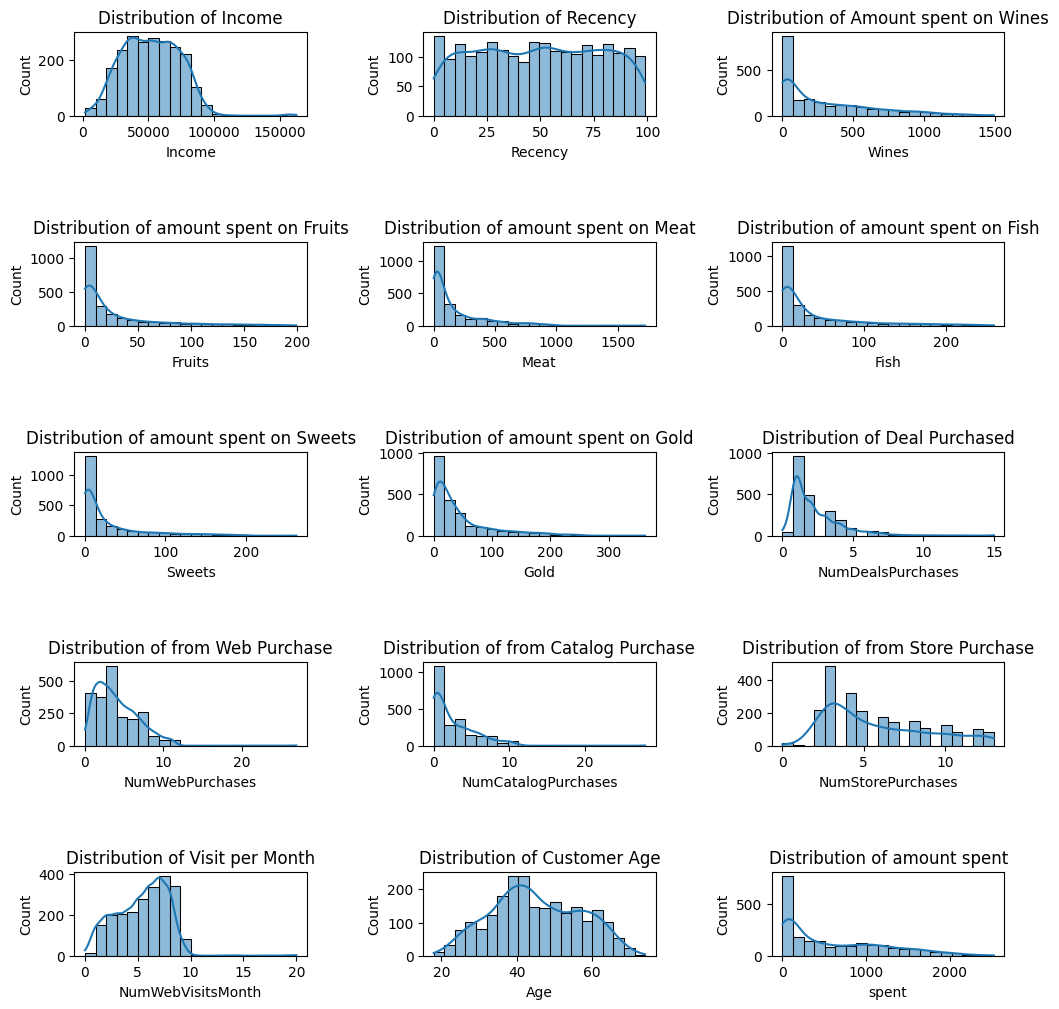

In [29]:
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 1.5, wspace=0.5)

plt.subplot(5, 3, 1)
sns.histplot(df['Income'], kde = True, bins = 20)
plt.title("Distribution of Income")

plt.subplot(5, 3, 2)
sns.histplot(df, x = 'Recency', kde = True, bins = 20)
plt.title("Distribution of Recency")

plt.subplot(5, 3, 3)
sns.histplot(df, x = "Wines", kde = True, bins = 20)
plt.title("Distribution of Amount spent on Wines")

plt.subplot(5, 3, 4)
sns.histplot(df, x = 'Fruits', kde = True, bins = 20)
plt.title("Distribution of amount spent on Fruits")

plt.subplot(5, 3, 5)
sns.histplot(df, x = 'Meat', kde = True, bins = 20)
plt.title("Distribution of amount spent on Meat")

plt.subplot(5, 3, 6)
sns.histplot(df, x = 'Fish', kde = True, bins = 20)
plt.title("Distribution of amount spent on Fish")

plt.subplot(5, 3, 7)
sns.histplot(df, x = 'Sweets', kde = True, bins = 20)
plt.title("Distribution of amount spent on Sweets")

plt.subplot(5, 3, 8)
sns.histplot(df, x = 'Gold', kde = True, bins = 20)
plt.title("Distribution of amount spent on Gold")

plt.subplot(5, 3, 9)
sns.histplot(df, x = 'NumDealsPurchases', kde = True, bins = 20)
plt.title("Distribution of Deal Purchased")

plt.subplot(5, 3, 10)
sns.histplot(df, x = 'NumWebPurchases', kde = True, bins = 20)
plt.title("Distribution of from Web Purchase")

plt.subplot(5, 3, 11)
sns.histplot(df, x = 'NumCatalogPurchases', kde = True, bins = 20)
plt.title("Distribution of from Catalog Purchase")

plt.subplot(5, 3, 12)
sns.histplot(df, x = 'NumStorePurchases', kde = True, bins = 20)
plt.title("Distribution of from Store Purchase")

plt.subplot(5, 3, 13)
sns.histplot(df, x = 'NumWebVisitsMonth', kde = True, bins = 20)
plt.title("Distribution of Visit per Month")

plt.subplot(5, 3, 14)
sns.histplot(df, x = 'Age', kde = True, bins = 20)
plt.title("Distribution of Customer Age")

plt.subplot(5, 3, 15)
sns.histplot(df['spent'], kde = True, bins = 20)
plt.title("Distribution of amount spent")

plt.show()

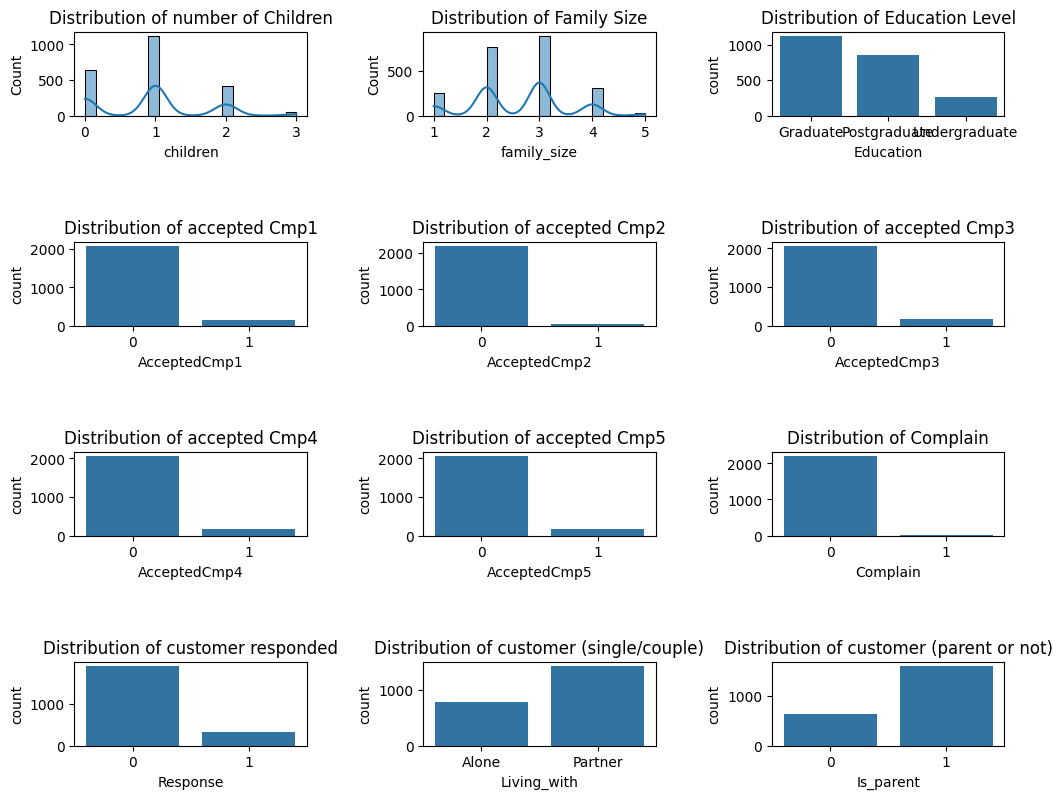

In [30]:
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 1.5, wspace=0.5)

plt.subplot(5, 3, 1)
sns.histplot(df, x = 'children', kde = True, bins = 20)
plt.title("Distribution of number of Children")

plt.subplot(5, 3, 2)
sns.histplot(df, x = 'family_size', kde = True, bins = 20)
plt.title('Distribution of Family Size')

plt.subplot(5, 3, 3)
sns.countplot(df, x = 'Education')
plt.title("Distribution of Education Level")

plt.subplot(5, 3, 4)
sns.countplot(df, x = 'AcceptedCmp1')
plt.title("Distribution of accepted Cmp1")

plt.subplot(5, 3, 5)
sns.countplot(df, x = 'AcceptedCmp2')
plt.title("Distribution of accepted Cmp2")

plt.subplot(5, 3, 6)
sns.countplot(df, x = 'AcceptedCmp3')
plt.title("Distribution of accepted Cmp3")

plt.subplot(5, 3, 7)
sns.countplot(df, x = 'AcceptedCmp4')
plt.title("Distribution of accepted Cmp4")

plt.subplot(5, 3, 8)
sns.countplot(df, x = 'AcceptedCmp5')
plt.title("Distribution of accepted Cmp5")

plt.subplot(5, 3, 9)
sns.countplot(df, x = 'Complain')
plt.title('Distribution of Complain')

plt.subplot(5, 3, 10)
sns.countplot(df, x = 'Response')
plt.title('Distribution of customer responded')

plt.subplot(5, 3, 11)
sns.countplot(df, x = 'Living_with')
plt.title("Distribution of customer (single/couple)")

plt.subplot(5, 3, 12)
sns.countplot(df, x = 'Is_parent')
plt.title("Distribution of customer (parent or not)")

plt.show()

Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.
<li>Dropping the outliers by setting a cap on Age and income. 

In [31]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2236


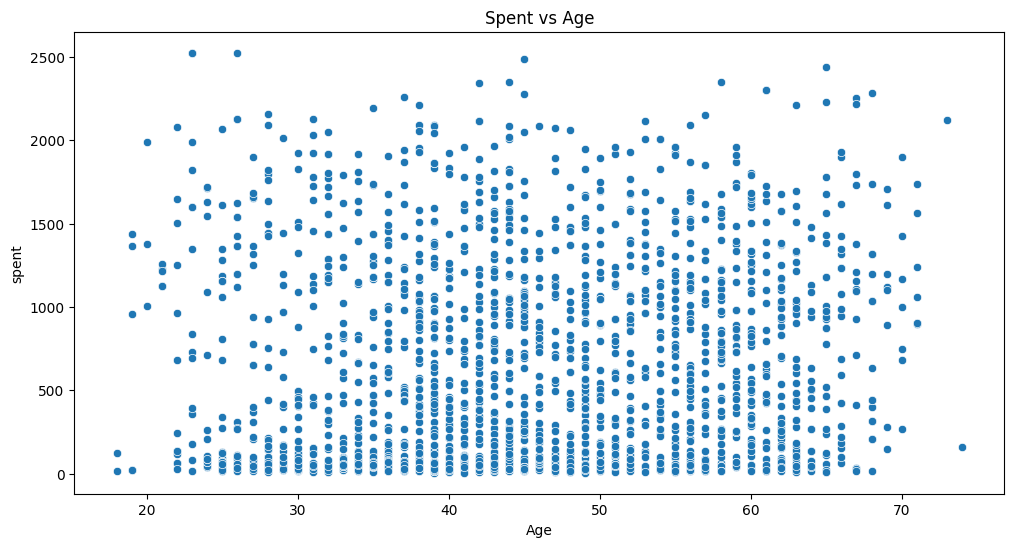


Correlation between Age and Spent: 0.11361767213727979


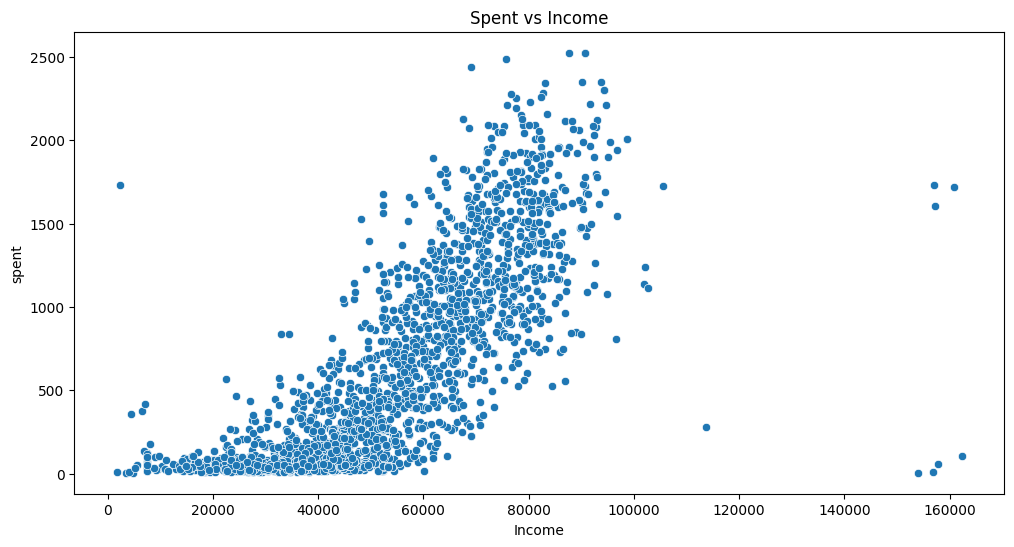


Correlation between Income and Spent: 0.7892919948976487


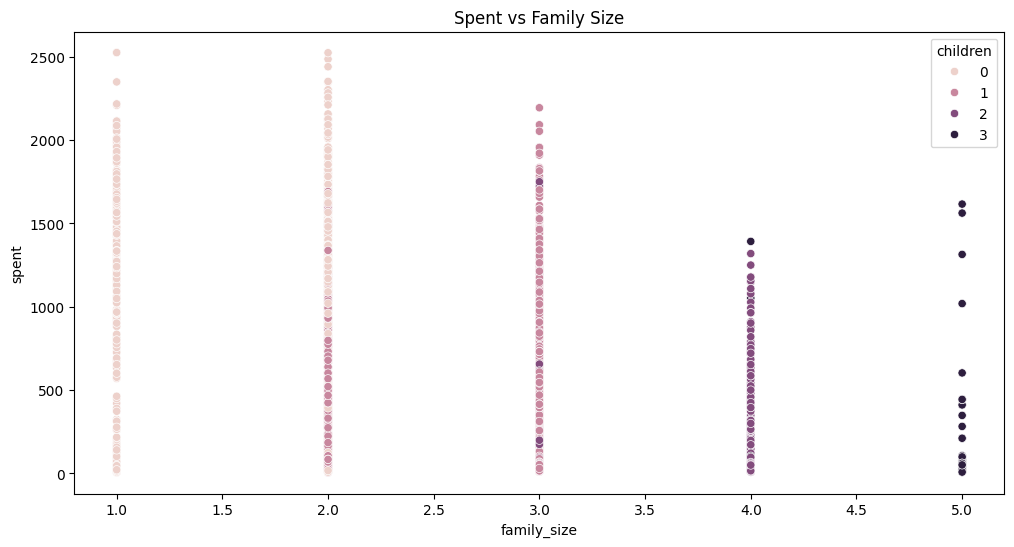


Correlation between Family_size and Spent: -0.4234571504105184


In [32]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Age', y = 'spent')
plt.title("Spent vs Age")
plt.show()
print(f"\nCorrelation between Age and Spent: {df['Age'].corr(df['spent'])}")

plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Income', y = 'spent')
plt.title("Spent vs Income")
plt.grid(False)
plt.show()
print(f"\nCorrelation between Income and Spent: {df['Income'].corr(df['spent'])}")

plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'family_size', y = 'spent', hue = 'children')
plt.title("Spent vs Family Size")
plt.show()
print(f"\nCorrelation between Family_size and Spent: {df['family_size'].corr(df['spent'])}")

From Spent vs Family size plot, we can see that as Family size increase , spent decreases. Correlation score is -0.42.

In [33]:
df.groupby(['Living_with', 'Is_parent', 'children']).agg({"spent" : ['mean']})

spent
                                       mean
Living_with Is_parent children             
Alone       0         0         1105.401575
            1         1          462.455026
                      2          236.326241
                      3          222.904762
Partner     0         0         1104.496084
            1         1          479.633199
                      2          250.792857
                      3          308.531250

<li>The Mean of Spent is nearly same for customer with 0 children either he/she is living alone or with partner.
<li>As the number of children increases, Mean of Spent decreases.
<li>Except Customer living with partner and have 3 children. Its mean is more than customer living with partner and have 2 children.

In [34]:
# Check how many categorical variables are present in data
a = (df.dtypes == 'object')
object_cols = list(a[a].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_with']


The following steps are applied to preprocess the data:
<li>Label encoding the categorical features
<li>Scaling the features using the standard scaler
<li>Creating a subset dataframe for dimensionality reduction

In [35]:
# Convert to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in object_cols:
  df[i] = df[[i]].apply(le.fit_transform)

In [36]:
df.head()

,Age,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,spent,Living_with,children,family_size,Is_parent
0,57,0,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,1617,0,0,1,0
1,60,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,27,0,2,3,1
2,49,0,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,776,1,0,2,0
3,30,0,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,53,1,1,3,1
4,33,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,422,1,1,3,1


Next, let us look at the correlation amongst the features.

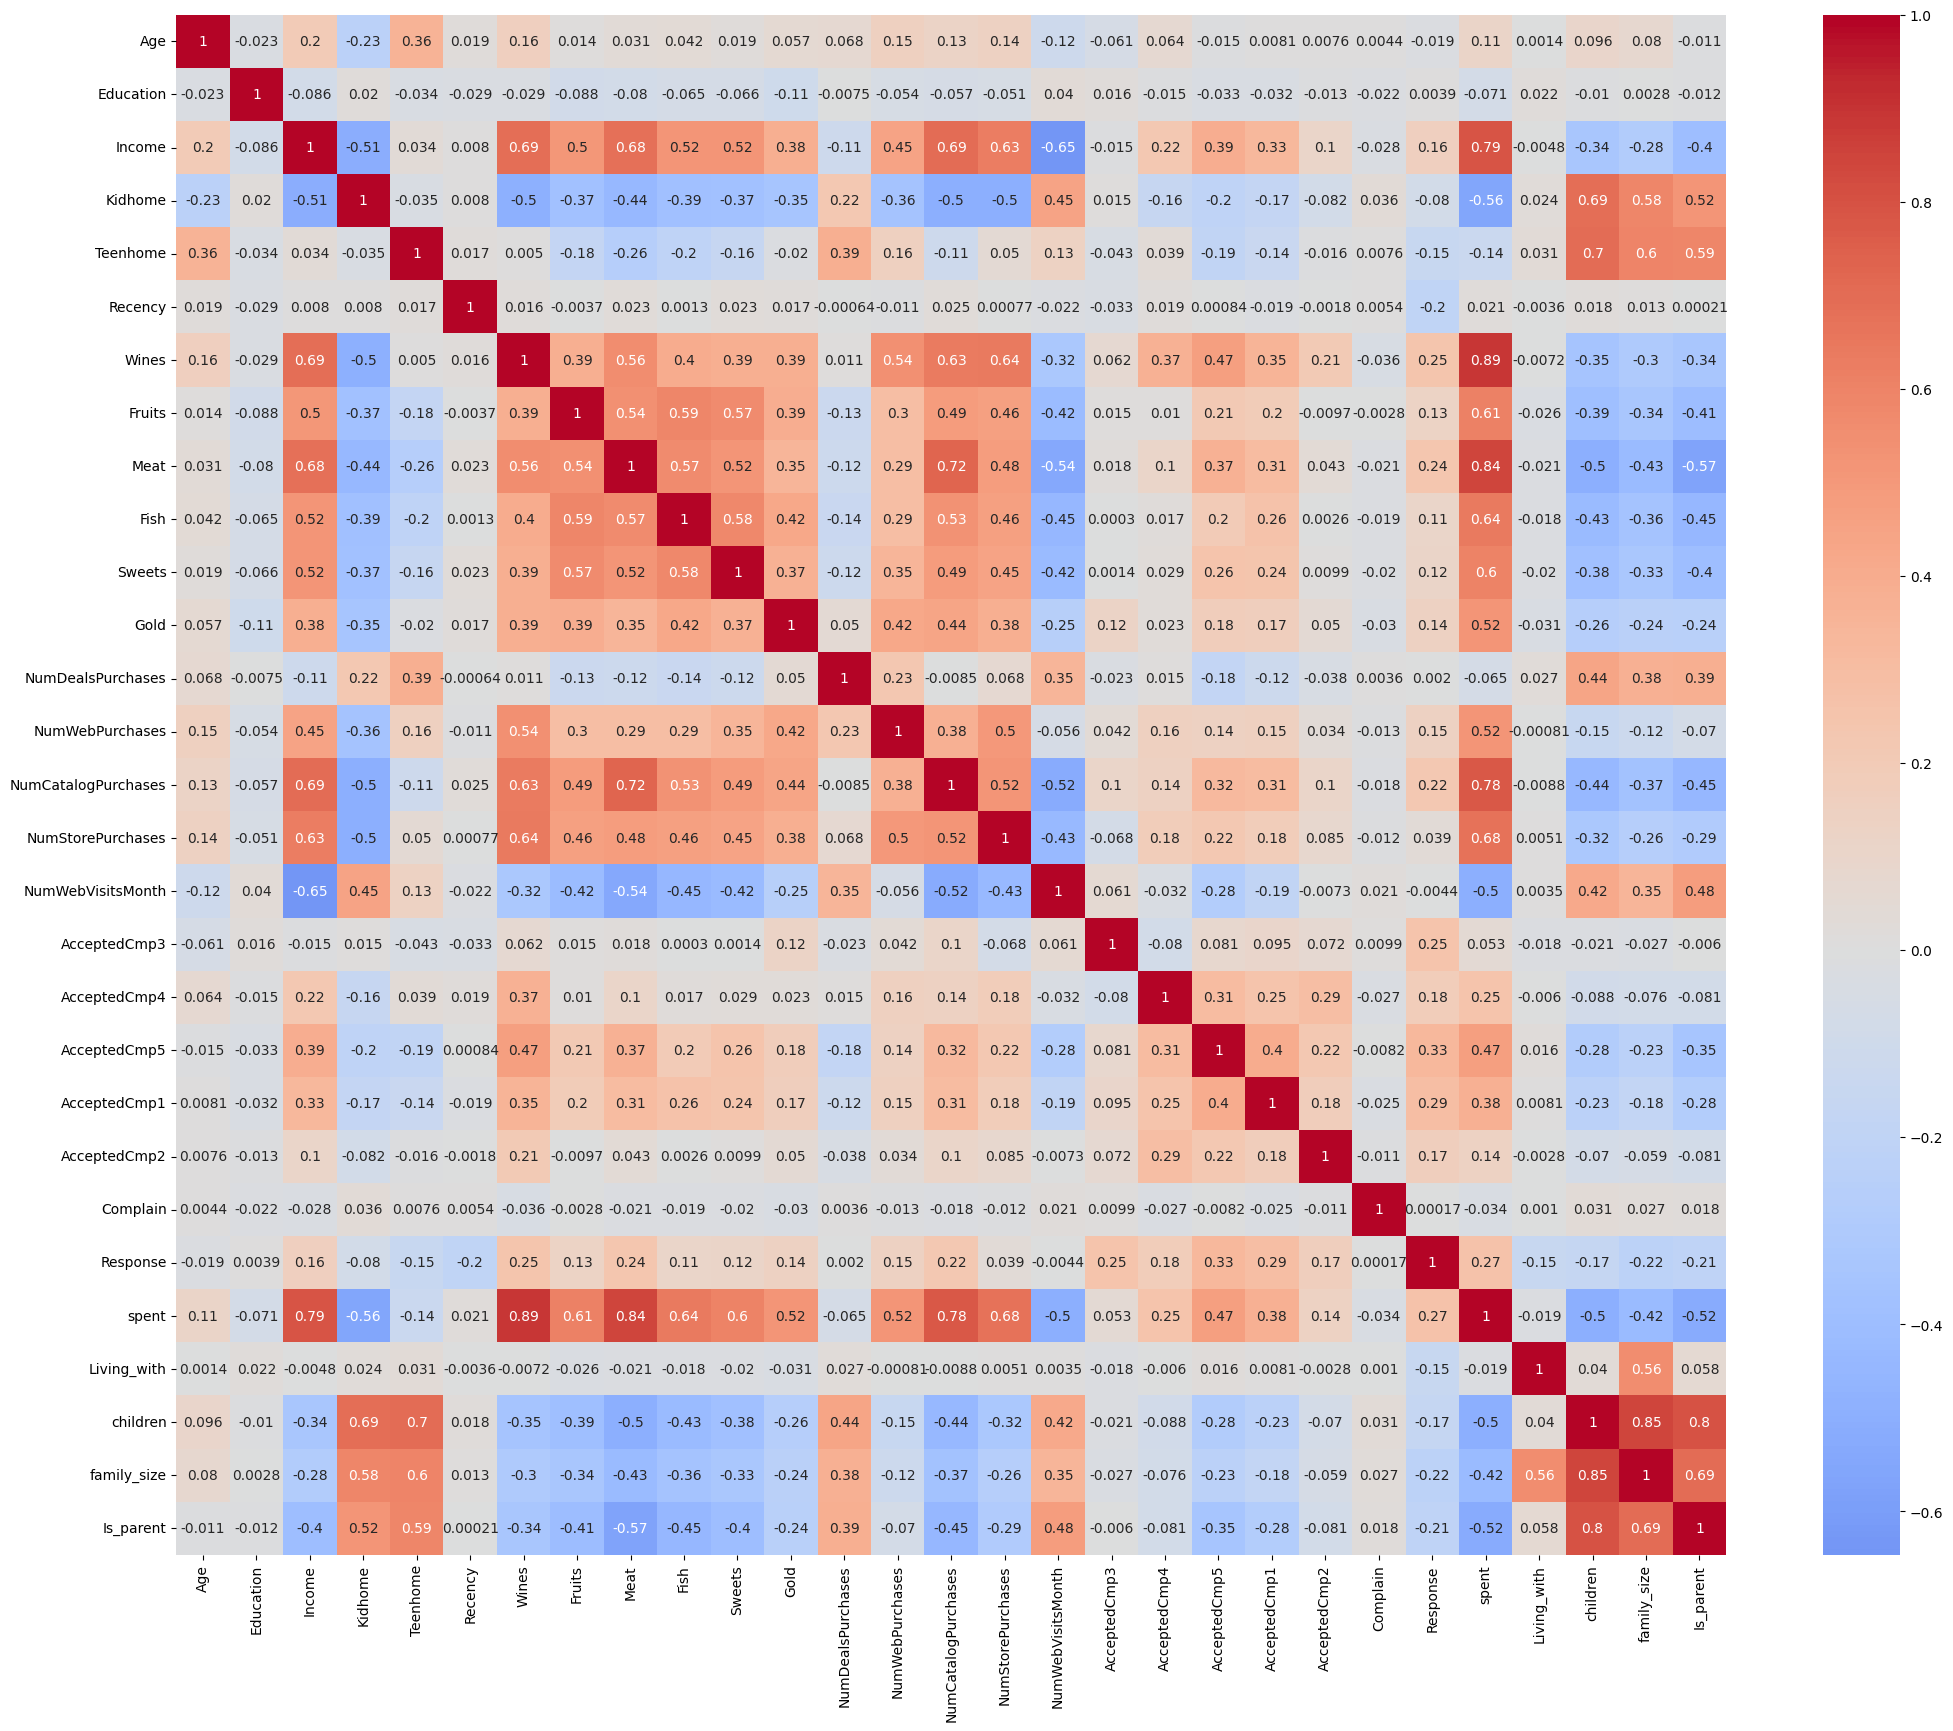

In [37]:
corrmax = df.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corrmax, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

There are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:

Dimensionality reduction with PCA
Plotting the reduced dataframe

In [38]:
new_df=df.copy()

In [39]:
from sklearn.preprocessing import StandardScaler


# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the entire dataset and transform the data
scaled_dataset = scaler.fit_transform(new_df)


In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components = 0.95)
pca_result = pca.fit_transform(scaled_dataset)
pca.n_components_

21

In [42]:
pca_result.shape

(2236, 21)

Clustering

Choosing the number of cluster using Elbow method

Inertia ia a metric used to evaluate the quality of a clustering solution. It measures the compactness of the clusters, quantifying how far the points within a cluster are from the centroid of that cluster. The inertia for a particular cluster is the sum of the squared distances between each data point in the cluster and the centroid of the cluster. The objective of the K-means algorithm is to minimize the overall inertia, meaning that the data points within each cluster should be as close as possible to their cluster's centroid.

Lower inertia values indicate that the data points are closer to the centroids of their respective clusters, implying a better, more compact clustering.

When using K-means to find the optimal number of clusters, you can plot the inertia for different values of K (number of clusters) and look for the "elbow" in the plot. The point where the reduction in inertia starts to slow down (the "elbow") is often considered the optimal number of clusters. This technique is known as the Elbow Method.

We will use KElbowVisualizer

In [43]:
!pip install yellowbrick

Elbow Method to determine the number of clusters to be formed:


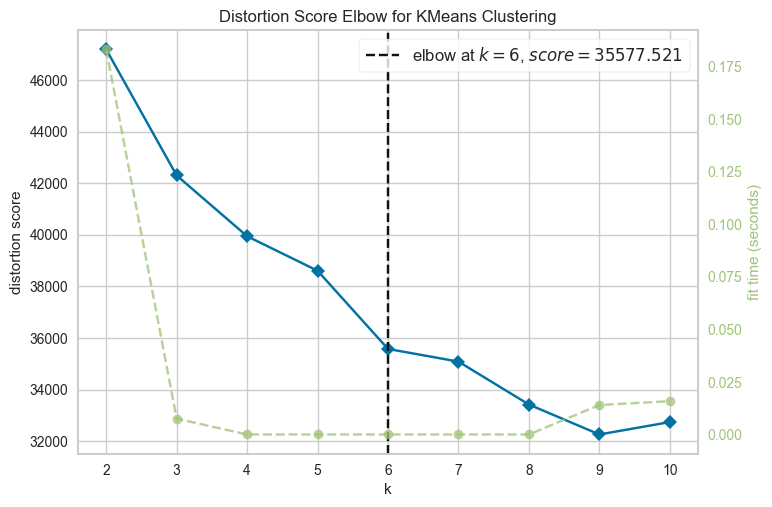

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print("Elbow Method to determine the number of clusters to be formed:")
elbow = KElbowVisualizer(KMeans(), k = 10)
elbow.fit(pca_result)
elbow.show()

The inertia is not a good performance metric when trying to choose K. Because it keeps getting lower as we increase K. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. This technique for choosing the best value for the number of clusters is rather coarse.

A more precise (but also more computationally expensive) approach is to use the silhouette score.

The silhouette score is a metric used to evaluate the quality of clusters in unsupervised learning, including clustering algorithms like K-means. It provides a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Near +1: The sample is far away from the neighboring clusters, indicating it is well-clustered.

0: The sample is on or very close to the decision boundary between two neighboring clusters.

Near -1: The sample may be assigned to the wrong cluster.

The number of clusters that maximizes the silhouette score is often considered the best choice.

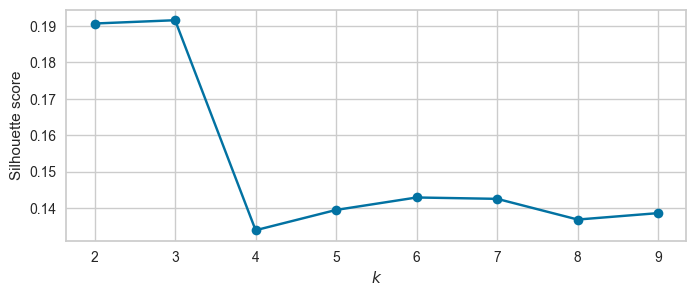

In [45]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(pca_result)
                for k in range(2, 11)]

silhouette_scores = [silhouette_score(pca_result, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

plt.grid(True)

plt.show()

In [46]:
# Print Silhouette score for each cluster

cluster_range = range(2, 10)
for i, score in zip(cluster_range, silhouette_scores):
  print(f"Silhouette Score for {i} Clusters:", score)

Silhouette Score for 2 Clusters: 0.19065168455438353
Silhouette Score for 3 Clusters: 0.19155629730854512
Silhouette Score for 4 Clusters: 0.13394033424905832
Silhouette Score for 5 Clusters: 0.13950921238983768
Silhouette Score for 6 Clusters: 0.14292370084870878
Silhouette Score for 7 Clusters: 0.14254776486783227
Silhouette Score for 8 Clusters: 0.1368676992597249
Silhouette Score for 9 Clusters: 0.13863582692164367


An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram. Each diagram contains one knife shape per cluster. The shape's height indicates the number of instances in the cluster, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better).

The vertical dashed lines represent the mean silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score, then the cluster is rather bad since this means its instances are much too close to other clusters.

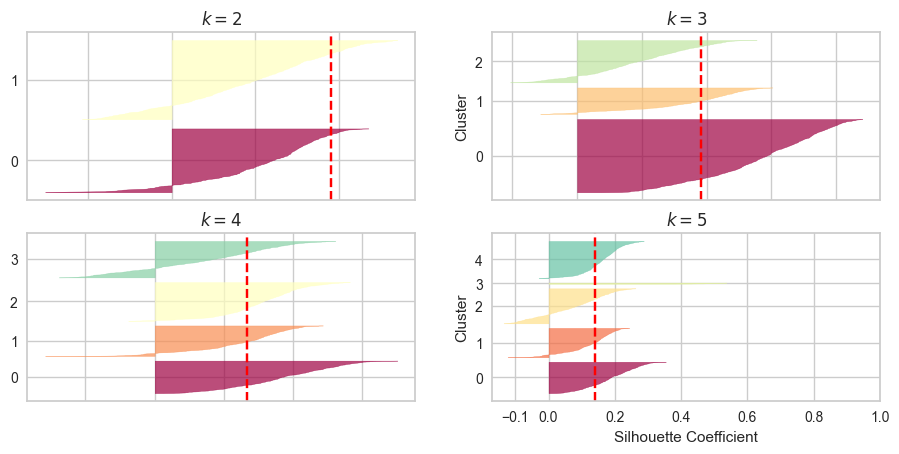

In [47]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 10))

for k in (2, 3, 4, 5):
    plt.subplot(4, 2, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(pca_result, y_pred)

    padding = len(pca_result) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

From Silhouette score, we will choose optimal number of clusters 3 or4

From Silhouette Diagram, we can see that for K=3, the 4th cluster has very less number of instances. Therefore we will not choose K=4.

In [48]:
PCA_result = pd.DataFrame(pca_result)

In [49]:


KM_clusters = KMeans(n_clusters=3, n_init='auto',init='k-means++').fit(PCA_result) # initialise and fit K-Means model

KM_clustered = PCA_result.copy()
KM_clustered.loc[:,'Cluster'] = KM_clusters.labels_

In [50]:
KM_clust_sizes = KM_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,641
1,1077
2,518


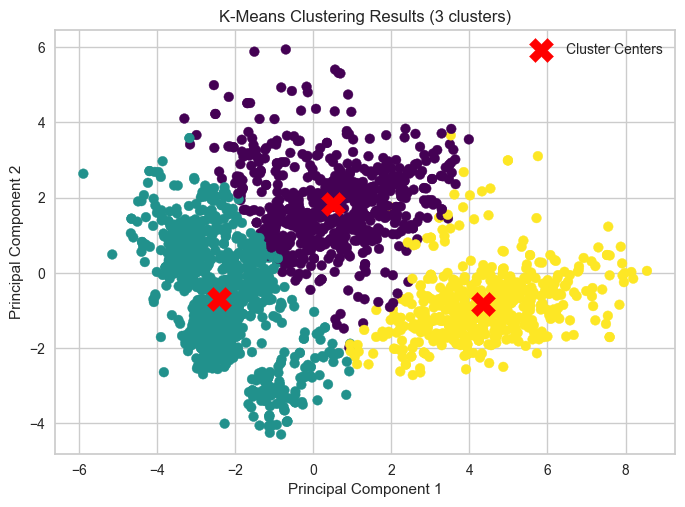

In [51]:
import matplotlib.pyplot as plt

# Scatter plot for the first two principal components (change as needed)
plt.scatter(PCA_result.iloc[:, 0], PCA_result.iloc[:, 1], c=KM_clusters.labels_, cmap='viridis')

# Plotting cluster centers
plt.scatter(KM_clusters.cluster_centers_[:, 0], KM_clusters.cluster_centers_[:, 1], s=300, marker='X', c='red', label='Cluster Centers')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results (3 clusters)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Density Based Spatial Clustering of Application with Noise Clustering
      DBSCAN Clustering is a density based clustering algorithm that is used for unsupervised learning problems.

In a bid to eliminate the problems of K-Means Clustering with nested data and high-dimensional data, DBSCAN Clustering eliminates it! It's has 3 important terms & 2 important hyperparameters :
Terms :
<li>Core Point : It is the center point that has minPts number of data points present in it's area and the points under it's area can extend the cluster.
<li>Non-Core Point : It is the center point that does not have minPts number of data points present in it's area and it cannot extend the cluster.
<li>Outliers / Noise : It is the data points that are not a part of any cluster.
                                                
<li>minPts : It is the minimum number of data points that need to be present in the area of a point to be considered as a core point.
<li>Epsilon : It is the radius of the area of a center point.

In [52]:
#Density Based Spatial Clustering
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

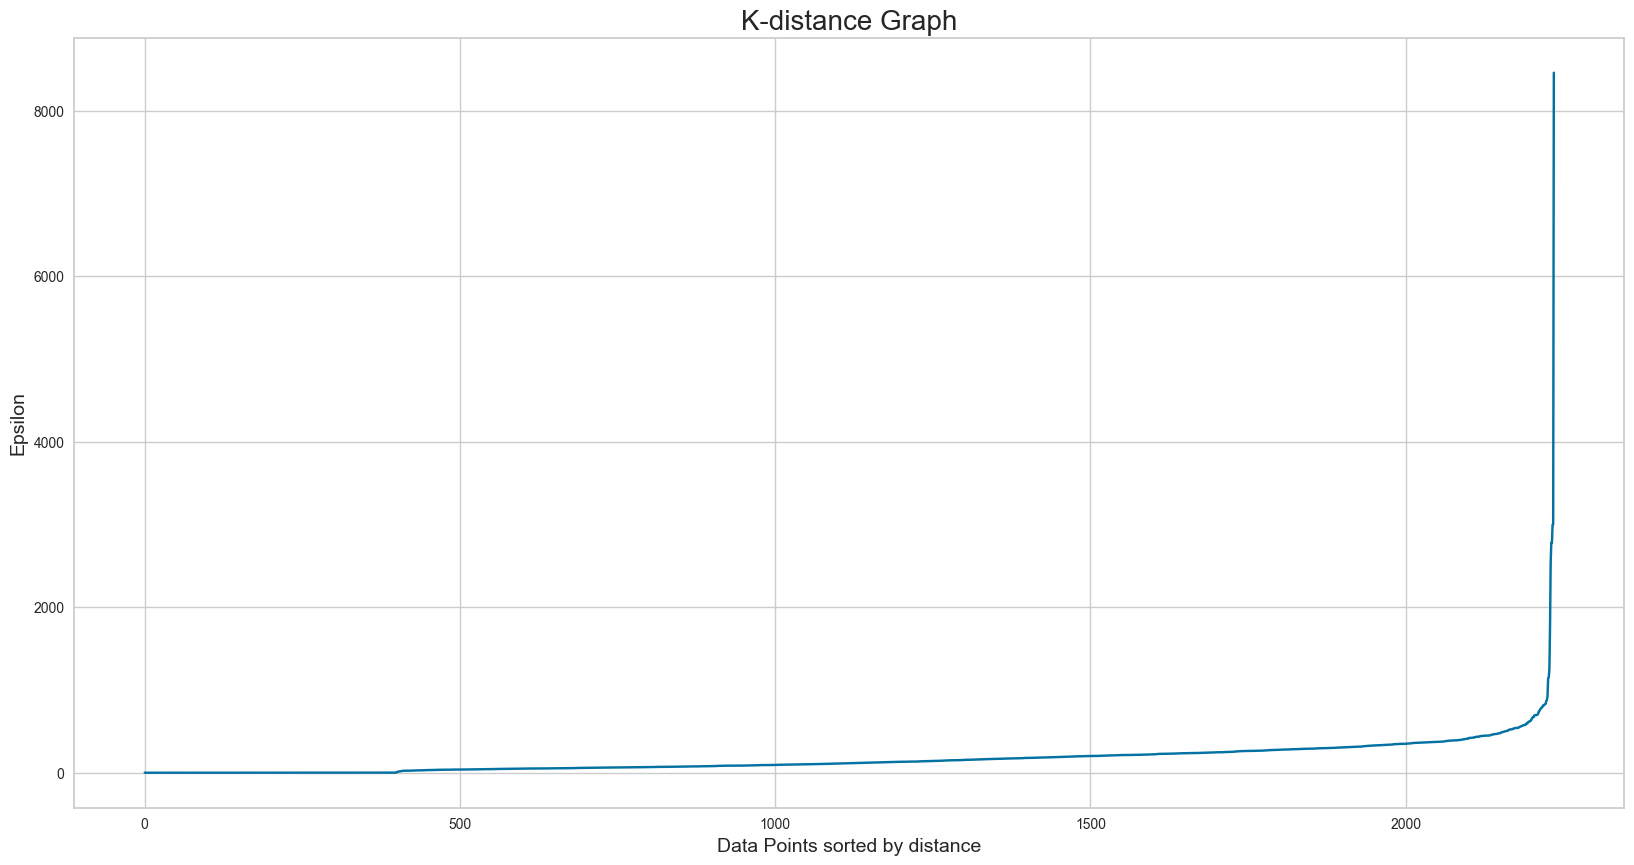

In [53]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [54]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=500,min_samples=6)
dbscan_opt.fit(df)

DBSCAN(eps=500, min_samples=6)

In [55]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 0    1752
-1     232
 3     116
 2      93
 5      15
 1      12
 6       8
 4       8
Name: count, dtype: int64